In [1]:
%matplotlib inline
import healpy
import numpy as np
import scipy.stats
import fitsio

In [2]:
g2m = fitsio.read('g2m_64.fits')

We are interested in using the Gaia coordinates from DR1 to use improved astrometry in the APOGEE-2 plate design. However, several things must be checked before we do so.

The APOGEE-2 targets are selected from 2MASS, and thus will always have 2MASS coordinates. Prior to anything else, we want to verify that the 2MASS system is not systematically different than the Gaia system. If so, this will remove a variable from our further investigations.

However, this doesn't answer the question completely. We will still have to ask the question as to whether it will be worth it to switch wholesale to Gaia coordinates for every target that it exists for. This will only be worth it if there are enough such targets; in many fields there should be but somebody needs to check that. 

For the targets without Gaia coordinates, ideally something should be done about the proper motions (though not MUCH is done right now). In the analysis below, I check whether it could be useful to apply a mean proper motion to such cases, and conclude that that is not very promising. There may be better ways to apply an estimated PM, however.

## Testing the 2MASS as a system

Anyway, before any more vexing questions, we are interested in asking whether the 2MASS system agrees with the Gaia system. To ask this question we must remove the effects of proper motion. This we can do by comparing the TGAS stars, which have proper motions from Gaia, at the same epoch (2015). 

Below are maps of these differences averaged over 1 deg radius circles on the sky as a function of position. The first two plots are the mean differences in RA and Dec. The second two plots are the standard deviations within each circle. 

The bottom line is that things look fine. Peak-to-peak the differences between the systems are $\pm 0.1$ arcsec, and the standard deviation in the mean differences is about 0.02 arcsec. 

The standard deviations within each circle are typically about 0.08 arcsec, and are probably just dominated by the 2MASS statistical errors.

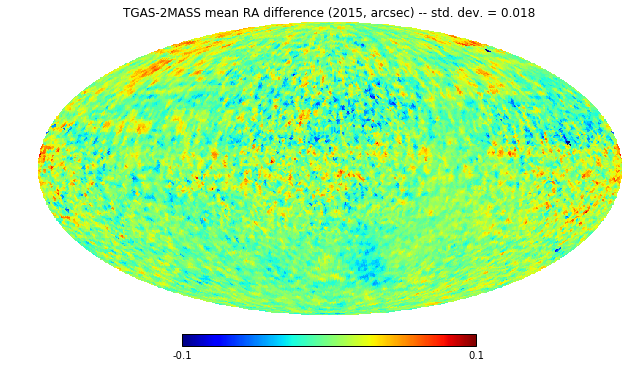

In [3]:
ra_std = np.std(g2m['MDRA_PMONLY'])
title = 'TGAS-2MASS mean RA difference (2015, arcsec) -- std. dev. = {ra_std:5.3f}'
title = title.format(ra_std=ra_std)
healpy.visufunc.mollview(map=g2m['MDRA_PMONLY'], min=-0.1, max=0.1, rot=(180., 0., 0.),
                        title=title)

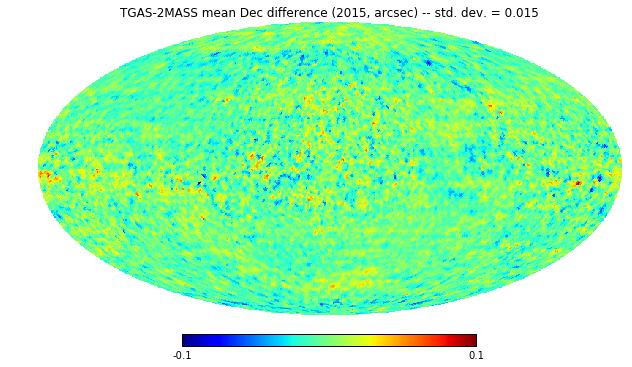

In [4]:
dec_std = np.std(g2m['MDDEC_PMONLY'])
title = 'TGAS-2MASS mean Dec difference (2015, arcsec) -- std. dev. = {dec_std:5.3f}'
title = title.format(dec_std=dec_std)
healpy.visufunc.mollview(map=g2m['MDDEC_PMONLY'], min=-0.1, max=0.1, rot=(180., 0., 0.),
                        title=title)

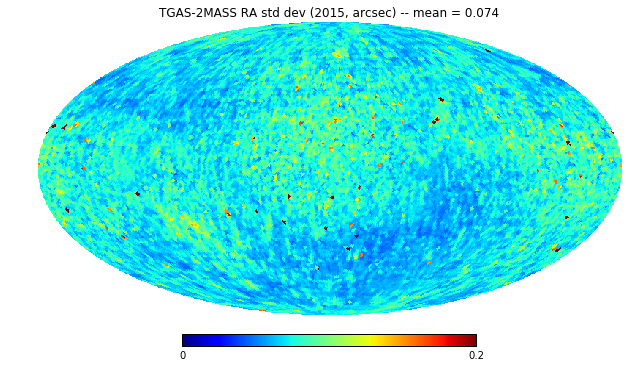

In [5]:
ra_mean = np.mean(g2m['SDRA_PMONLY'])
title = 'TGAS-2MASS RA std dev (2015, arcsec) -- mean = {ra_mean:5.3f}'
title = title.format(ra_mean=ra_mean)
healpy.visufunc.mollview(map=g2m['SDRA_PMONLY'], min=0.0, max=0.2, rot=(180., 0., 0.),
                        title=title)

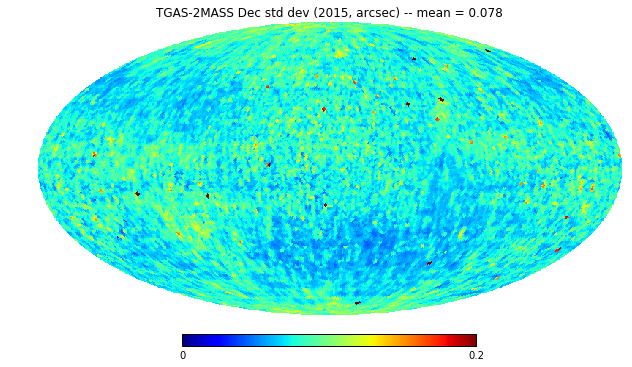

In [6]:
dec_mean = np.mean(g2m['SDDEC_PMONLY'])
title = 'TGAS-2MASS Dec std dev (2015, arcsec) -- mean = {dec_mean:5.3f}'
title = title.format(dec_mean=dec_mean)
healpy.visufunc.mollview(map=g2m['SDDEC_PMONLY'], min=0.0, max=0.2, rot=(180., 0., 0.),
                        title=title)

## Looking at proper motions

It is worthwhile asking what the actual differences are between the coordinates when proper motions are neglected. First, we can just look at the typical differences for all stars that match. These differences are big, obviously, since this is 15 years of motion. Also, if you look at the variation within each patch around the mean differences, this is quite big too. You pretty much expect this.

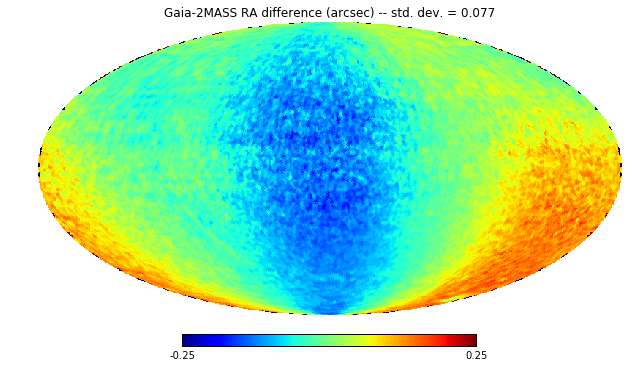

In [7]:
ra_std = np.std(scipy.stats.sigmaclip(g2m['MDRA'])[0])
title = 'Gaia-2MASS RA difference (arcsec) -- std. dev. = {ra_std:5.3f}'
title = title.format(ra_std=ra_std)
healpy.visufunc.mollview(map=g2m['MDRA'], min=-0.25, max=0.25, rot=(180., 0., 0.),
                        title=title)

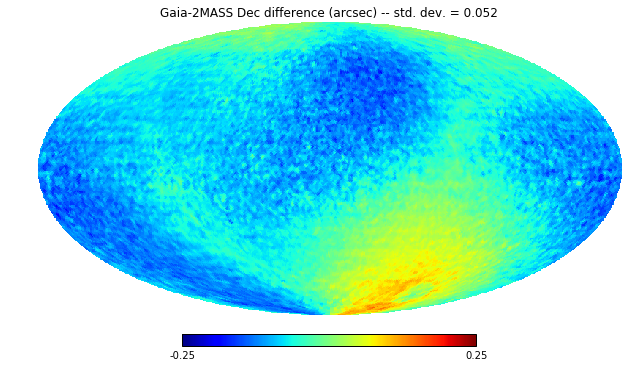

In [8]:
dec_std = np.std(g2m['MDDEC'])
title = 'Gaia-2MASS Dec difference (arcsec) -- std. dev. = {dec_std:5.3f}'
title = title.format(dec_std=dec_std)
healpy.visufunc.mollview(map=g2m['MDDEC'], min=-0.25, max=0.25, rot=(180., 0., 0.),
                        title=title)

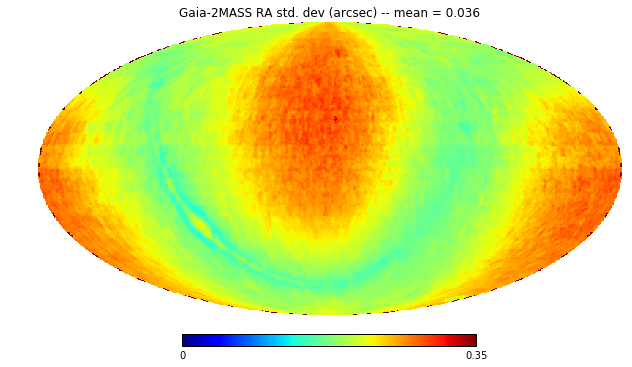

In [9]:
ra_mean = np.mean(scipy.stats.sigmaclip(g2m['SDRA'])[0])
title = 'Gaia-2MASS RA std. dev (arcsec) -- mean = {ra_mean:5.3f}'
title = title.format(ra_mean=ra_mean)
healpy.visufunc.mollview(map=g2m['SDRA'], min=0.0, max=0.35, rot=(180., 0., 0.),
                        title=title)

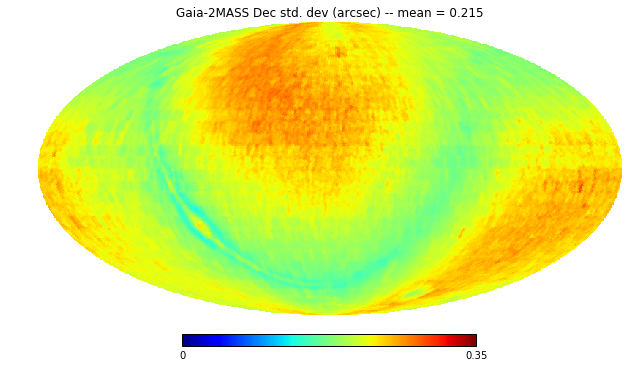

In [17]:
dec_mean = np.mean(scipy.stats.sigmaclip(g2m['SDDEC'])[0])
title = 'Gaia-2MASS Dec std. dev (arcsec) -- mean = {dec_mean:5.3f}'
title = title.format(dec_mean=dec_mean)
healpy.visufunc.mollview(map=g2m['SDDEC'], min=0.0, max=0.35, rot=(180., 0., 0.),
                        title=title)

## Trying to correct for average proper motions

You might think you could make some progress by correcting the proper motions of all the stars by the average of the stars that you know. If you could show that applying the mean proper motion reduced the scatter between 2MASS and Gaia for those stars in Gaia, you could use this mean proper motion with some justification for stars not in Gaia.

The residuals below show the result of this. Indeed this works pretty well in the mean and reduced the mean differences, but the scatter about the mean found above is large enough that correcting for the mean offset yields only a small improvement in the scatter about the mean, so this is likely to not yield much net benefit for the stars whose coordinates are not to be found in Gaia.

Note that this possible method would be suspect even if these results were more promising, since obviously the stars not in Gaia are going to be systematically different from those in Gaia.

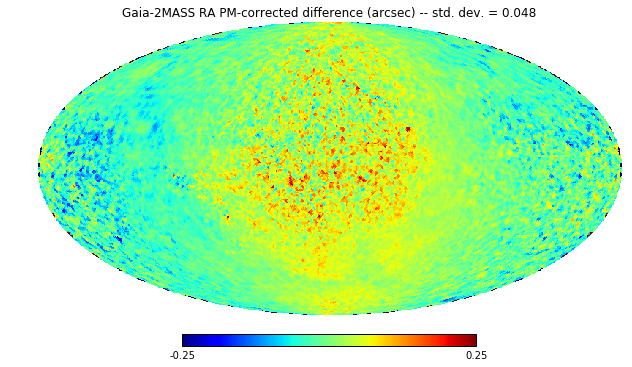

In [11]:
ra_std = np.std(scipy.stats.sigmaclip(g2m['MDRA_CORRECTED'])[0])
title = 'Gaia-2MASS RA PM-corrected difference (arcsec) -- std. dev. = {ra_std:5.3f}'
title = title.format(ra_std=ra_std)
healpy.visufunc.mollview(map=g2m['MDRA_CORRECTED'], min=-0.25, max=0.25, rot=(180., 0., 0.),
                        title=title)

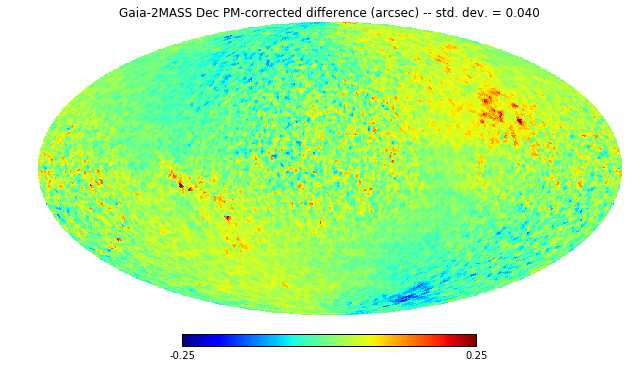

In [12]:
dec_std = np.std(g2m['MDDEC_CORRECTED'])
title = 'Gaia-2MASS Dec PM-corrected difference (arcsec) -- std. dev. = {dec_std:5.3f}'
title = title.format(dec_std=dec_std)
healpy.visufunc.mollview(map=g2m['MDDEC_CORRECTED'], min=-0.25, max=0.25, rot=(180., 0., 0.),
                        title=title)

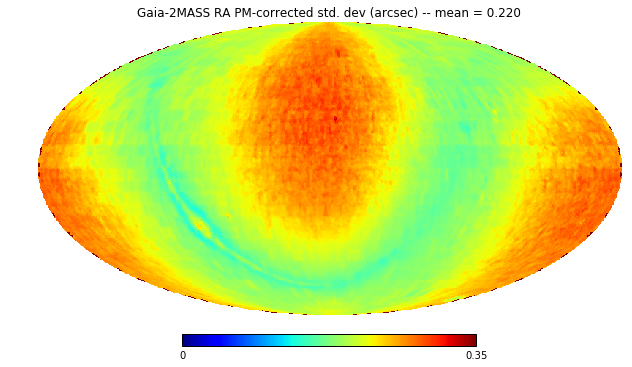

In [16]:
ra_mean = np.mean(scipy.stats.sigmaclip(g2m['SDRA_CORRECTED'])[0])
title = 'Gaia-2MASS RA PM-corrected std. dev (arcsec) -- mean = {ra_mean:5.3f}'
title = title.format(ra_mean=ra_mean)
healpy.visufunc.mollview(map=g2m['SDRA_CORRECTED'], min=0.0, max=0.35, rot=(180., 0., 0.),
                        title=title)

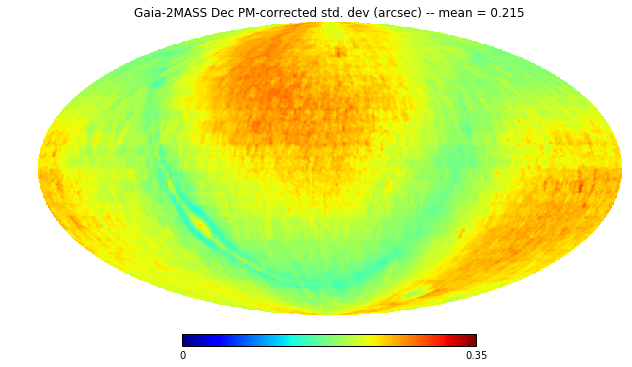

In [15]:
dec_mean = np.mean(g2m['SDDEC_CORRECTED'])
title = 'Gaia-2MASS Dec PM-corrected std. dev (arcsec) -- mean = {dec_mean:5.3f}'
title = title.format(dec_mean=dec_mean)
healpy.visufunc.mollview(map=g2m['SDDEC_CORRECTED'], min=0.0, max=0.35, rot=(180., 0., 0.),
                        title=title)